<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_ex_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1 de árboles de decisiones, 13 del curso

# Clasificación

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz

# Datos para clasificar
De los datos de [juguete de sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html) usamos el de los vinos.

Tiene 178 vinos con 14 atributos.

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

#### Visualización del dataframe

In [ ]:
vinos = pd.DataFrame(wine.data, columns=wine.feature_names)
vinos['target'] = wine.target
vinos.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Clases de vinos definidos por la variable dependiente target

###### Valores únicos de la variable independiente y su frecuencía

In [ ]:
vinos['target'].unique()

array([0, 1, 2])

In [ ]:
vinos['target'].value_counts()

,count
target,
1,71
0,59
2,48


###### Las etiquetas

In [ ]:
tipos_vinos = wine.target_names.tolist()
tipos_vinos

['class_0', 'class_1', 'class_2']

## Separamos los datos en la matriz de las variables dependientes (X) y en el vector de la variable dependiente (y)

In [ ]:
y = vinos['target']
X = vinos.drop('target', axis=1)

## Dividimos los datos en dos subconjuntos: train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


## Entrenamos el modelo árbol de decision

In [ ]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

#### Entendiendo los parametros del árbol
Cuando llamas a arbol.get_params(), obtienes un diccionario que contiene los parámetros utilizados para instanciar y entrenar el modelo DecisionTreeClassifier. A continuación, te explico algunos de los parámetros más comunes y relevantes:

+ **Poda de Costo-Complejidad** [Cost-Complexity Pruning] (ccp_alpha): Esta técnica de poda busca el subárbol que minimiza una función de costo que considera tanto el error de clasificación del árbol como su complejidad. La fórmula general para esta función de costo es:

    Costo(T) = Error(T) + ccp_alpha * |T|

    Donde:

      + Costo(T) es el costo del árbol T.
      + Error(T) es el error de clasificación del árbol T en el conjunto de entrenamiento o un conjunto de validación.
      + ccp_alpha es el parámetro de regularización.
      + |T| es el número de nodos hoja en el árbol T (una medida de la complejidad del árbol).

    El Parámetro ccp_alpha: Este parámetro controla la severidad de la poda.

      + Un valor de ccp_alpha = 0 no aplica poda de costo-complejidad (el árbol crece hasta su máxima complejidad permitida por otros parámetros).
      + A medida que ccp_alpha aumenta, la penalización por la complejidad del árbol se vuelve mayor, lo que lleva a árboles más pequeños y más podados.

+ **class_weight**: Este parámetro te permite especificar pesos para cada clase. Durante el entrenamiento, el algoritmo de árbol de decisión dará más importancia a las instancias de las clases con pesos más altos.

  + None (predeterminado): Todas las clases tienen un peso de 1.
  + 'balanced': Scikit-learn calculará automáticamente los pesos de las clases basándose en la frecuencia inversa de las clases. Es decir, las clases minoritarias tendrán pesos más altos y las clases mayoritarias tendrán pesos más bajos. La fórmula utilizada es: n_samples / (n_classes * n_samples_in_class).
  + Diccionario: Puedes proporcionar un diccionario donde las claves son las etiquetas de las clases y los valores son los pesos que deseas asignar a cada clase. Por ejemplo, {0: 1, 1: 10} asignaría un peso 1 a la clase 0 y un peso 10 a la clase 1.

+ **criterion**: Este parámetro especifica la función para medir la calidad de una división. Las opciones más comunes son:

  + 'gini': Utiliza la impureza Gini.
  + 'entropy': Utiliza la ganancia de información (entropía). Determina cómo se evalúa la "pureza" de los nodos durante el crecimiento del árbol.

+ **max_depth**: Este parámetro define la profundidad máxima del árbol. Limitar la profundidad puede ayudar a prevenir el sobreajuste. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

+ **max_features**: Este parámetro especifica el número de características a considerar al buscar la mejor división.

  + Si es un entero, considera max_features características en cada división.
  + Si es un flotante, considera una fracción de max_features características.
  + Si es 'auto', considera todas las características (equivalente a n_features).
  + Si es 'sqrt', considera la raíz cuadrada del número de características.
  + Si es 'log2', considera la base 2 logaritmo del número de características.

+ **max_leaf_nodes**: Este parámetro define el número máximo de nodos hoja. Si es None, el número de nodos hoja es ilimitado.

+ **min_impurity_decrease**: Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.

+ **min_samples_leaf**: Este parámetro especifica el número mínimo de muestras requeridas para estar en un nodo hoja. Un punto de división en cualquier profundidad solo se considerará si deja al menos min_samples_leaf muestras de entrenamiento en cada una de las ramas hijas.

+ **min_samples_split**: Este parámetro especifica el número mínimo de muestras requeridas para dividir un nodo interno.

  + Si es un entero, es el número mínimo absoluto de muestras.
  + Si es un flotante, es la fracción mínima de muestras.
+ **min_weight_fraction_leaf**: Similar a min_samples_leaf, pero se expresa como una fracción ponderada del número total de muestras de entrenamiento.

+ **monotonic_cst** en DecisionTreeClassifier: Este parámetro es una característica más reciente en las versiones de scikit-learn (a partir de la versión 0.23) que te permite imponer este tipo de restricciones a las características de entrada. Se espera una lista, tupla o array donde cada elemento corresponde a una característica en el mismo orden que las características de entrenamiento.

  + Si el valor para una característica es 1, la relación entre esa característica y la variable objetivo debe ser monótonamente creciente.
  + Si el valor es -1, la relación debe ser monótonamente decreciente.
  + Si el valor es 0, no se impone ninguna restricción de monotonicidad para esa característica.

+ **random_state**: Este parámetro controla la aleatoriedad del estimador. Si se le asigna un entero, se asegura que los resultados sean reproducibles.

+ **splitter**: Este parámetro determina la estrategia utilizada para elegir la división en cada nodo. Las opciones son:

  + 'best': Elige la mejor división.
  + 'random': Elige la mejor división aleatoria.


In [ ]:
arbol.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

#### ¿Qué profundidad tiene nuestro árbol?

In [ ]:
arbol.get_depth()

3

#### ¿Cuantas hojas tiene nuestro árbol?

In [ ]:
arbol.get_n_leaves()

np.int64(5)

####¿Que etiquetas está tratando de predecir el árbol?

In [ ]:
arbol.classes_

array([0, 1, 2])

## Hacemos las predicciones con el sunconjunto de datos de prueba

In [ ]:
predicciones = arbol.predict(X_test)

In [ ]:
predicciones

array([2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 0, 2, 1, 1, 2, 2, 2])

In [ ]:
predicciones_etiquetadas = [tipos_vinos[i] for i in predicciones]
print(predicciones_etiquetadas)

['class_2', 'class_0', 'class_0', 'class_1', 'class_1', 'class_2', 'class_2', 'class_1', 'class_1', 'class_1', 'class_0', 'class_1', 'class_1', 'class_2', 'class_1', 'class_0', 'class_1', 'class_2', 'class_2', 'class_2', 'class_2', 'class_0', 'class_0', 'class_1', 'class_0', 'class_0', 'class_1', 'class_0', 'class_1', 'class_2', 'class_1', 'class_0', 'class_0', 'class_1', 'class_2', 'class_1', 'class_0', 'class_1', 'class_2', 'class_1', 'class_0', 'class_0', 'class_1', 'class_2', 'class_0', 'class_2', 'class_2', 'class_0', 'class_2', 'class_1', 'class_1', 'class_2', 'class_2', 'class_2']


## Evaluación del modelo

#### Confusion matrix

In [ ]:
print(confusion_matrix(y_test, predicciones))

[[16  2  0]
 [ 0 18  2]
 [ 0  0 16]]


### Informe de clasificación

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.90      0.90      0.90        20
           2       0.89      1.00      0.94        16

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



## Visualización del árbol

*   `arbol`: El objeto `DecisionTreeClassifier` entrenado.
*   `out_file`: El nombre del archivo donde se guardará la representación DOT.
*   `feature_names`: Una lista con los nombres de las características (columnas) de tu conjunto de datos.
*   `class_names`: Una lista con los nombres de las clases objetivo.
*   `filled`: Rellenar los nodos con colores para indicar la clase mayoritaria en cada nodo.
*   `rounded`: Redondear las esquinas de las cajas de los nodos.
*   `special_characters`: Usar caracteres especiales si es necesario.

Generamos la representación del árbol en el lenguaje DOT de Graphviz en el archivo "arbol_vinos.dot"

In [ ]:
export_graphviz(arbol, out_file="arbol_vinos.dot",
                    feature_names=X.columns,
                    class_names=tipos_vinos,
                    filled=True, rounded=True,
                    special_characters=True)

Leemos el gráfico desde el archivo "arbol_vinos.dot"

In [ ]:
with open("arbol_vinos.dot") as f:
  dot_graph = f.read()
  graph = graphviz.Source(dot_graph)

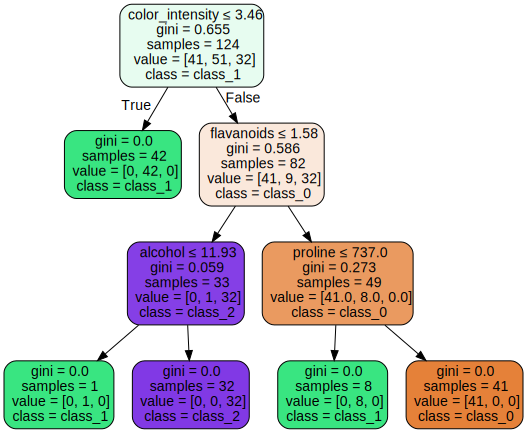

In [ ]:
display(graph)